# Week 7 Activity

1. Read the data into python
2. Check for null values
3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.
4. Carry out correlation analysis on the dataset and find the correlation factor between:
    * ph and Chloramines
    * ph and Conductivity 
    
What do we infer from this correlation value?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr

### 1. Read the data into python

In [7]:
df=pd.read_csv('Week_7_Activity_data.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


**Data Understanding:**
1. Data set showing the chemical property of 2011 observations.
2. There are 9 features in total.
3. All the features are float data-type with 64 bit.

### 2. Check for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


In [5]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

**Finding:**
* There is no null values present in the data set.

### 3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

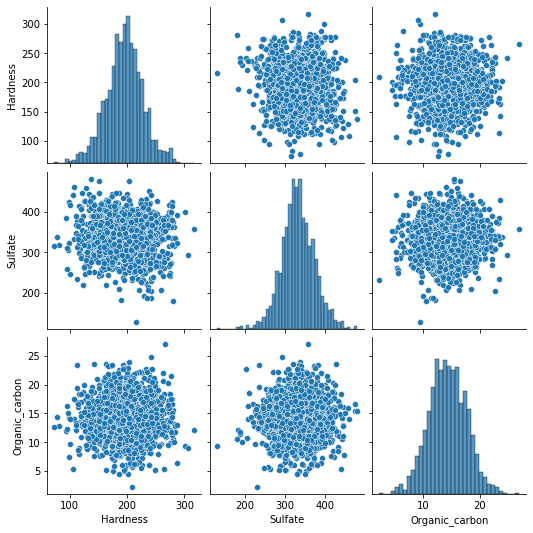

In [25]:
sns.pairplot(df[['Hardness','Sulfate','Organic_carbon']])
plt.show()

**Observations:**
1. All 3 variables are for float data type with 64 bit.
2. From the pair plot it is well clear that, 3 of them are almost normally distributed like a bell curve.
3. From the curve as well as from the describe function, we can conclude that standard deviation of Organic_carbon is very low (3.324) compared to other two.
4. While observing the pairplot, we can see that the range of Organic_carbon is very short (2.2 to nearly 27.05). which means that almost all values are fall within this small range.
5. For hardness its value ranges from almost 73.49 to 317.33, and that of for Sulfate is 129 to 481.03.

### 4.1. Carry out correlation analysis on the dataset and find the correlation factor between: 
a) ph and Chloramines. What do we infer from this correlation value?

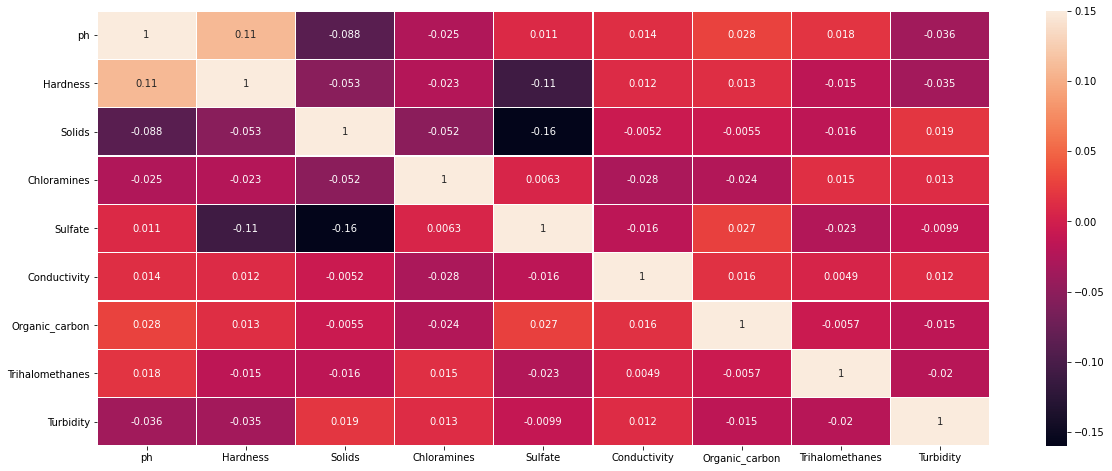

In [22]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.16,vmax=0.15,annot=True,linewidth=0.3)
plt.show()

**Inference:**(Of the entire data set)
1. There is no varibles have either strong positive or strong negative correlation.

In [33]:
x=df[['ph','Chloramines']]
ph=df['ph']
chlor=df['Chloramines']
pearsonr_coefficient,p_value=pearsonr(ph,chlor)
print('PearsonR correlation coefficient %0.3f'% (pearsonr_coefficient))

PearsonR correlation coefficient -0.025


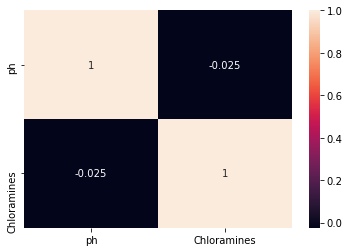

In [40]:
sns.heatmap(corrx,xticklabels=corrx.columns.values,yticklabels=corrx.columns.values,annot=True)
plt.show()

**Inference:**
* ph and chloramines have a correlation coeffient value of -0.025.
* The r value shows that this two variables have low negative correlation

### 4.2. Carry out correlation analysis on the dataset and find the correlation factor between: 
b) ph and Conductivity. What do we infer from this correlation value?

In [41]:
y=df[['ph','Conductivity']]
ph=df['ph']
cond=df['Conductivity']
pearsonr_coefficient,p_value=pearsonr(ph,cond)
print('PearsonR correlation coefficient %0.3f'% (pearsonr_coefficient))

PearsonR correlation coefficient 0.014


In [42]:
corry=y.corr()
corry

,ph,Conductivity
ph,1.000000,0.014128
Conductivity,0.014128,1.000000


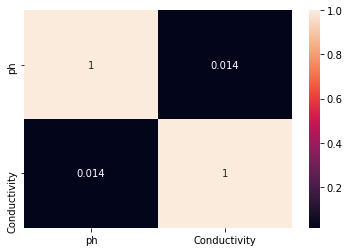

In [43]:
sns.heatmap(corry,xticklabels=corry.columns.values,yticklabels=corry.columns.values,annot=True)
plt.show()

**Inference:**
* ph and conductivity have a correlation coeffient value of 0.014.
* The r value shows that this two variables have low positive correlation.

##### Team 2: Nimisha A, Abdul Vahid K, Aparna E K, Chandni N P, Jibin K Joy